In [1]:
import learn
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("Multivariate_Linear_Regression_dataset.xlsx")
data


,taille_en_pieds_carre,nb_chambres,prix
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [3]:
Y = data['prix']
print(Y)
# b. Variables prédictives X (superficie et nombre de chambres)
X = data[['taille_en_pieds_carre', 'nb_chambres']]
print(X)

0     399900
1     329900
2     369000
3     232000
4     539900
5     299900
6     314900
7     198999
8     212000
9     242500
10    239999
11    347000
12    329999
13    699900
14    259900
15    449900
16    299900
17    199900
18    499998
19    599000
20    252900
21    255000
22    242900
23    259900
24    573900
25    249900
26    464500
27    469000
28    475000
29    299900
30    349900
31    169900
32    314900
33    579900
34    285900
35    249900
36    229900
37    345000
38    549000
39    287000
40    368500
41    329900
42    314000
43    299000
44    179900
45    299900
46    239500
Name: prix, dtype: int64
    taille_en_pieds_carre  nb_chambres
0                    2104            3
1                    1600            3
2                    2400            3
3                    1416            2
4                    3000            4
5                    1985            4
6                    1534            3
7                    1427            3
8            

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
# Conversion en DataFrame pour conserver les noms de colonnes
X_normalized = pd.DataFrame(X_normalized, columns=['taille_en_pieds_carre', 'nb_chambres'])

In [4]:
correlation_matrix = data.corr()
print(correlation_matrix)

                       taille_en_pieds_carre  nb_chambres      prix
taille_en_pieds_carre               1.000000     0.559967  0.854988
nb_chambres                         0.559967     1.000000  0.442261
prix                                0.854988     0.442261  1.000000


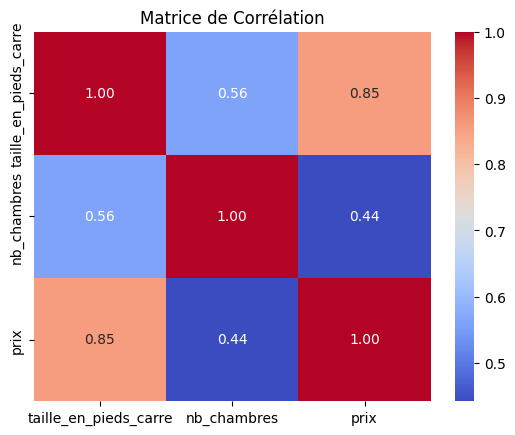

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

In [18]:
import statsmodels.api as sm

X_normalized = sm.add_constant(X_normalized)  


In [19]:
model = sm.OLS(Y, X_normalized).fit()
# Affichage du résumé statistique du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           2.43e-13
Time:                        10:31:35   Log-Likelihood:                -586.77
No. Observations:                  47   AIC:                             1180.
Df Residuals:                      44   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.404e+

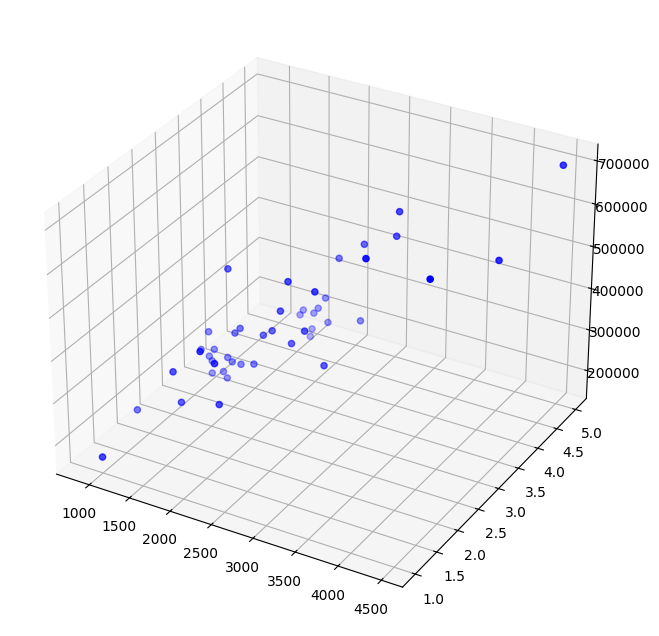

In [20]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracé des points de données
ax.scatter(data['taille_en_pieds_carre'], data['nb_chambres'], data['prix'], color='blue', marker='o')